
# Iris Flower Classification

![Iris Flower](https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg)

This notebook explores the Iris dataset and implements classification models to predict species of the iris flower.


# Data Preprocessing

### 1. Handling Missing Data

In [110]:

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('IRIS.csv')

# Checking for missing data
missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data)


Missing Data:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


### 2. Encoding Categorical Variables

In [111]:

# Encoding the categorical variable 'species'
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])


### 3. Feature Scaling

In [112]:

# Feature scaling
scaler = StandardScaler()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data[features] = scaler.fit_transform(data[features])


# Outlier Detection and Removal

In [113]:

# Step 1: Calculate the IQR for each feature to identify outliers
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Identify outliers
outlier_condition = (data[features] < (Q1 - 1.5 * IQR)) | (data[features] > (Q3 + 1.5 * IQR))

# Step 3: Filter out outliers
data_no_outliers = data[~outlier_condition.any(axis=1)]

# Step 4: Merge the cleaned data with the original data (only keeping non-outliers)
merged_data = pd.concat([data_no_outliers, data], axis=0).drop_duplicates()

# Checking the shape of the datasets to confirm the number of rows after removing outliers
original_shape = data.shape
cleaned_shape = data_no_outliers.shape
merged_shape = merged_data.shape

print("Original Data Shape:", original_shape)
print("Cleaned Data Shape:", cleaned_shape)
print("Merged Data Shape:", merged_shape)


Original Data Shape: (150, 5)
Cleaned Data Shape: (146, 5)
Merged Data Shape: (147, 5)


# Data Visualizations

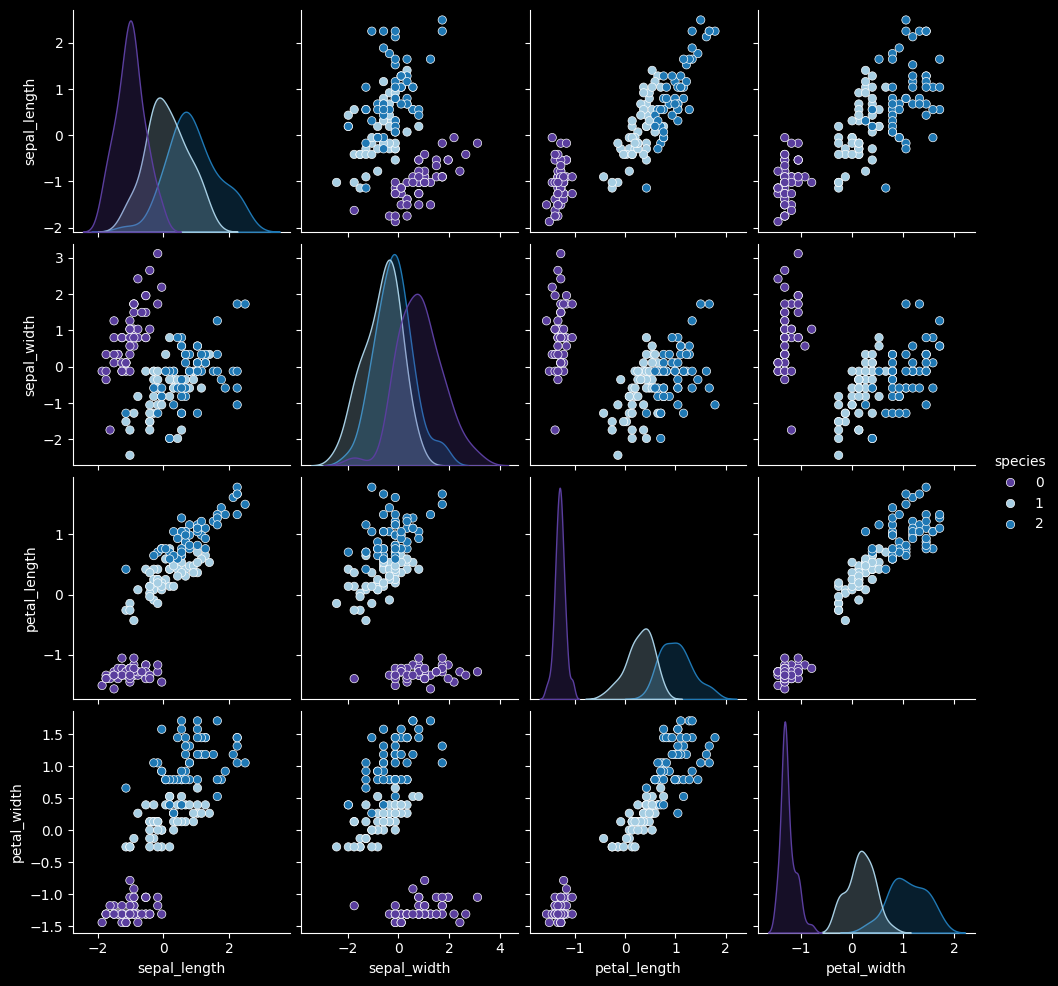

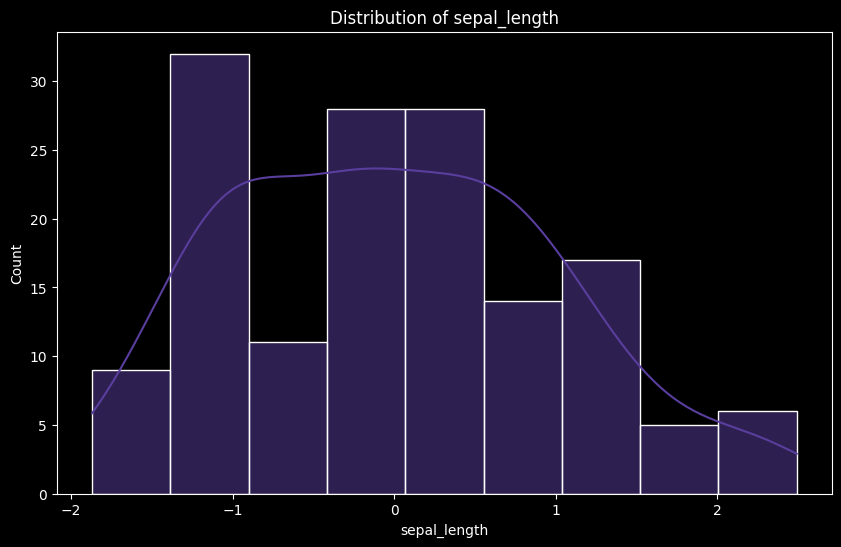

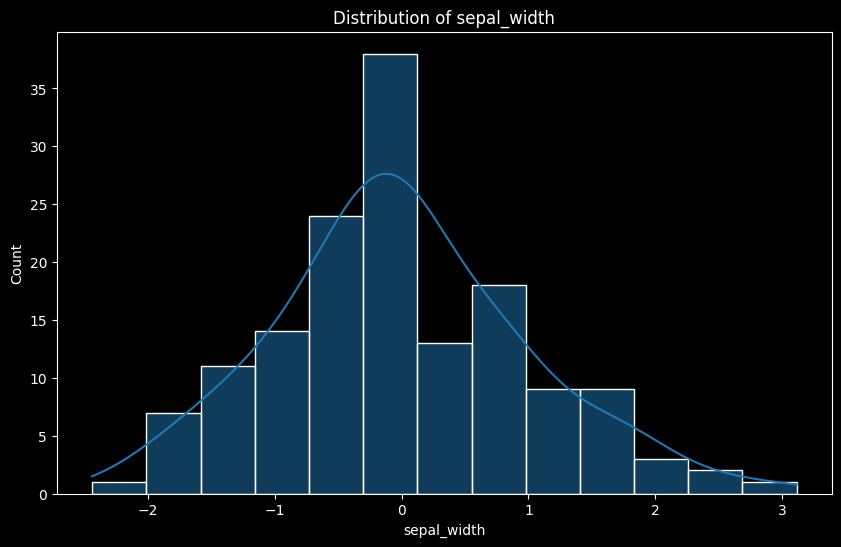

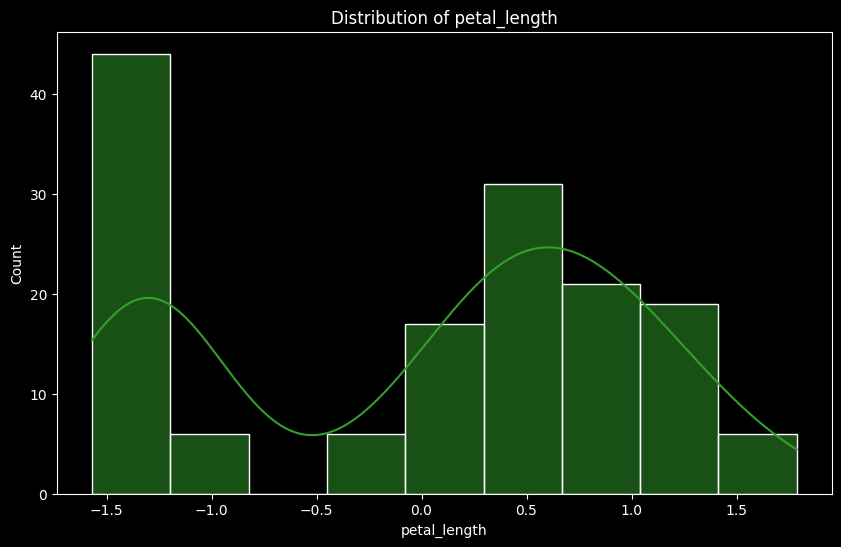

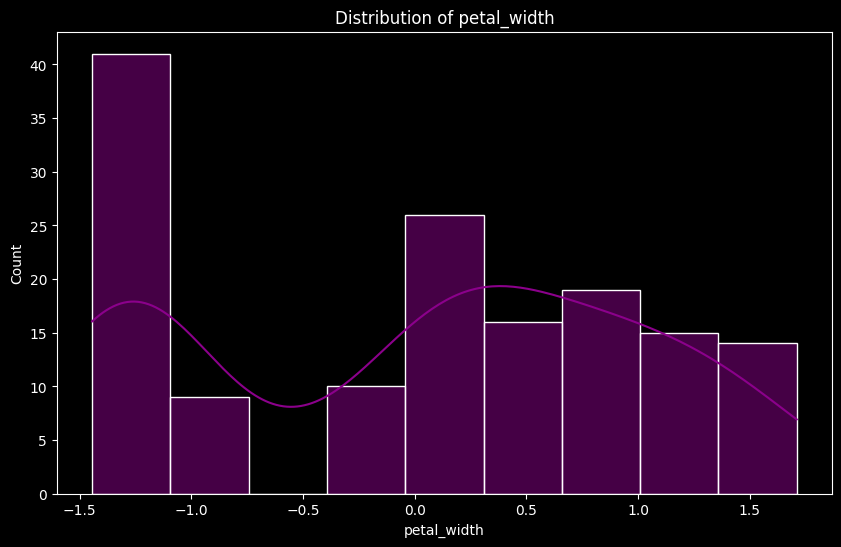

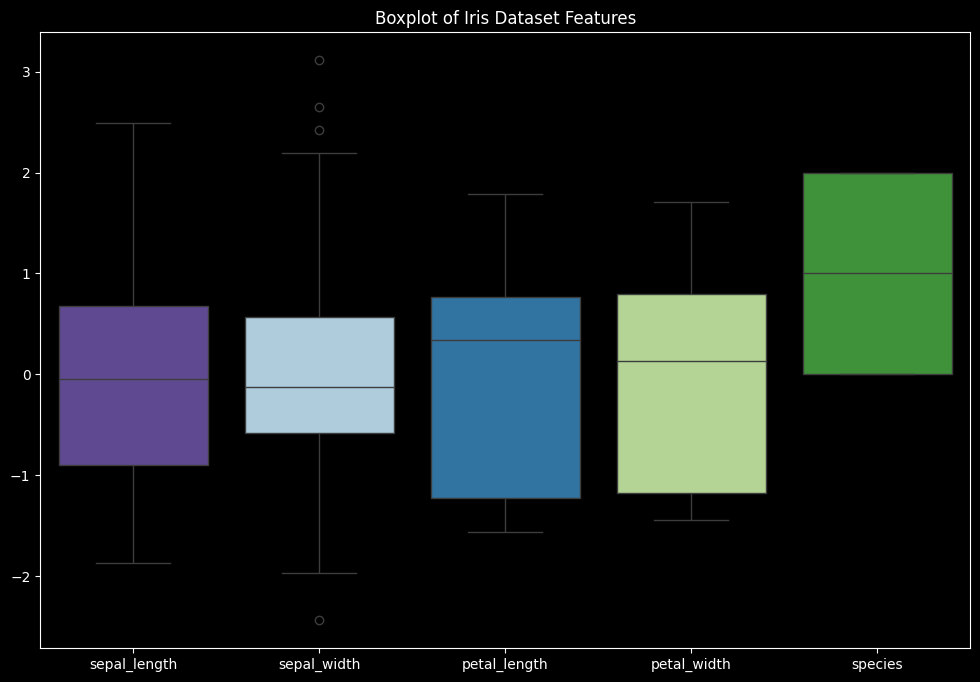

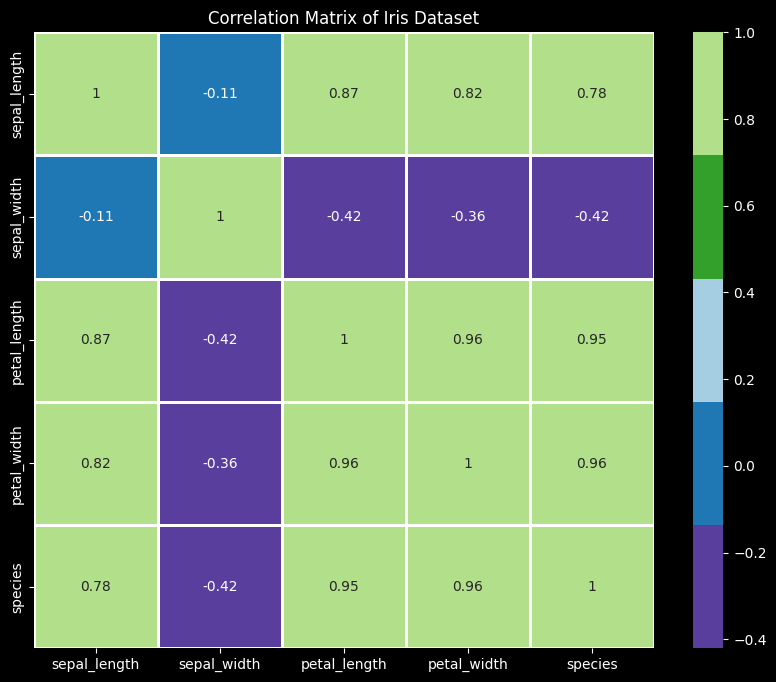

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the background to black for all plots
plt.style.use('dark_background')

# Define a custom palette inspired by iris flowers, focusing on purples, blues, greens, and white
iris_palette = ['#5A3E9E', '#A6CEE3', '#1F78B4', '#B2DF8A', '#33A02C', '#FFFFFF', '#8B008B', '#4B0082']

# Pairplot with enhanced colors inspired by iris flowers
sns.pairplot(data, hue='species', palette=iris_palette)
plt.show()

# Distribution of features with iris-inspired colors
feature_colors = ['#5A3E9E', '#1F78B4', '#33A02C', '#8B008B']  # No red or orange, just cool tones and white
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i, feature in enumerate(features):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True, color=feature_colors[i], edgecolor='white')
    plt.title(f'Distribution of {feature}', color='white')
    plt.show()

# Boxplot for outliers detection with iris-inspired palette
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, palette=iris_palette)
plt.title('Boxplot of Iris Dataset Features', color='white')
plt.show()

# Correlation matrix with a custom colormap inspired by iris flowers
plt.figure(figsize=(10, 8))
# Custom colormap: shades of purple, blue, and green
cmap = sns.color_palette(["#5A3E9E", "#1F78B4", "#A6CEE3", "#33A02C", "#B2DF8A"])
sns.heatmap(data.corr(), annot=True, cmap=cmap, linecolor='white', linewidths=1)
plt.title('Correlation Matrix of Iris Dataset', color='white')
plt.show()



# Splitting Data

In [115]:

# Splitting the dataset into training and testing sets
X = merged_data.drop('species', axis=1)
y = merged_data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Model Training

In [116]:

# Training a Logistic Regression model on the training set
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)


# Model Evaluation

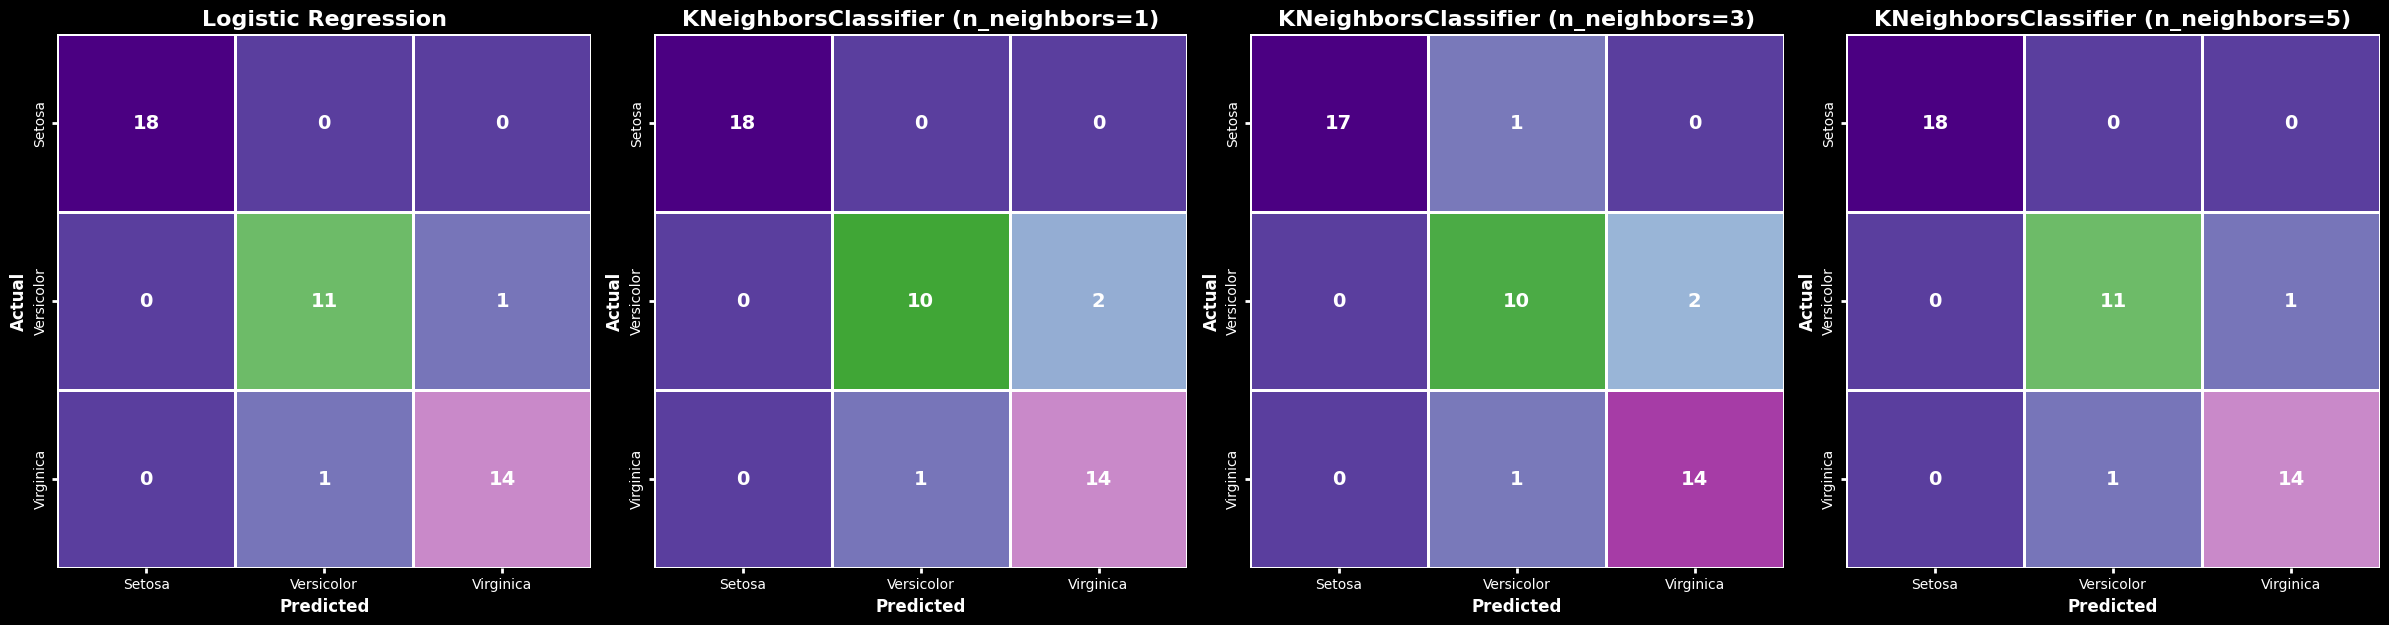

Overall Model Evaluation Results:


,Model,n_neighbors,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,-,0.955556,0.950000,0.950000,0.950000,0.997576
1,KNeighborsClassifier,1,0.933333,0.928030,0.922222,0.924264,0.997576
2,KNeighborsClassifier,3,0.911111,0.902778,0.903704,0.902663,0.997576
3,KNeighborsClassifier,5,0.955556,0.950000,0.950000,0.950000,0.997576



Detailed Evaluation for Logistic Regression:


,precision,recall,f1-score,support
Setosa,1.000000,1.000000,1.000000,18.000000
Versicolor,0.916667,0.916667,0.916667,12.000000
Virginica,0.933333,0.933333,0.933333,15.000000
accuracy,0.955556,0.955556,0.955556,0.955556
macro avg,0.950000,0.950000,0.950000,45.000000
weighted avg,0.955556,0.955556,0.955556,45.000000



Detailed Evaluation for KNeighborsClassifier (n_neighbors=1):


,precision,recall,f1-score,support
Setosa,1.000000,1.000000,1.000000,18.000000
Versicolor,0.909091,0.833333,0.869565,12.000000
Virginica,0.875000,0.933333,0.903226,15.000000
accuracy,0.933333,0.933333,0.933333,0.933333
macro avg,0.928030,0.922222,0.924264,45.000000
weighted avg,0.934091,0.933333,0.932959,45.000000



Detailed Evaluation for KNeighborsClassifier (n_neighbors=3):


,precision,recall,f1-score,support
Setosa,1.000000,0.944444,0.971429,18.000000
Versicolor,0.833333,0.833333,0.833333,12.000000
Virginica,0.875000,0.933333,0.903226,15.000000
accuracy,0.911111,0.911111,0.911111,0.911111
macro avg,0.902778,0.903704,0.902663,45.000000
weighted avg,0.913889,0.911111,0.911869,45.000000



Detailed Evaluation for KNeighborsClassifier (n_neighbors=5):


,precision,recall,f1-score,support
Setosa,1.000000,1.000000,1.000000,18.000000
Versicolor,0.916667,0.916667,0.916667,12.000000
Virginica,0.933333,0.933333,0.933333,15.000000
accuracy,0.955556,0.955556,0.955556,0.955556
macro avg,0.950000,0.950000,0.950000,45.000000
weighted avg,0.955556,0.955556,0.955556,45.000000


In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Define a custom palette inspired by iris flowers, focusing on purples, blues, greens, and white
iris_palette = ['#5A3E9E', '#A6CEE3', '#1F78B4', '#B2DF8A', '#33A02C', '#FFFFFF', '#8B008B', '#4B0082']

# Convert the list of colors into a colormap
iris_cmap = LinearSegmentedColormap.from_list("iris_cmap", iris_palette)

# Define class names (e.g., for the Iris dataset)
class_names = ['Setosa', 'Versicolor', 'Virginica']

# Initialize a list to collect results for each model
results = []
detailed_results = {}

# Function to plot confusion matrix with enhanced styling within a subplot
def plot_confusion_matrix_subplot(ax, y_true, y_pred, model_name, class_names, n_neighbors=None):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=iris_cmap, cbar=False, square=True, linewidths=2, linecolor='white',
                annot_kws={"size": 14, "weight": "bold", "color": "white"}, ax=ax, 
                xticklabels=class_names, yticklabels=class_names)  # Labeling the axes with class names
    title = f'{model_name}'
    if n_neighbors:
        title += f' (n_neighbors={n_neighbors})'
    ax.set_title(title, color='white', size=16, weight='bold')
    ax.set_xlabel('Predicted', color='white', size=12, weight='bold')
    ax.set_ylabel('Actual', color='white', size=12, weight='bold')
    ax.tick_params(axis='both', colors='white', labelsize=10, width=2)

# Function to evaluate and store results for each class
def evaluate_model(y_true, y_pred, model_name, n_neighbors=None):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    roc_auc = roc_auc_score(y_true, model.predict_proba(X_test), multi_class='ovr')
    
    # Append overall results to the list
    results.append({
        'Model': model_name,
        'n_neighbors': n_neighbors if n_neighbors is not None else '-',
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    })
    
    # Store detailed results for each class
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    detailed_results[f'{model_name} (n_neighbors={n_neighbors})' if n_neighbors else model_name] = report

# Existing Logistic Regression model evaluation
evaluate_model(y_test, y_pred, 'Logistic Regression')

# Prepare to plot confusion matrices
fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # Adjust layout as needed

# Plot the confusion matrix for Logistic Regression
plot_confusion_matrix_subplot(axes[0], y_test, y_pred, 'Logistic Regression', class_names)

# Test KNeighborsClassifier with different n_neighbors values
neighbors_values = [1, 3, 5]
best_knn_metrics = {}
best_knn_value = 0

for i, k in enumerate(neighbors_values, start=1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_proba = knn.predict_proba(X_test)
    
    # Evaluate model and store results
    evaluate_model(y_test, knn_pred, 'KNeighborsClassifier', n_neighbors=k)
    
    # Plot the confusion matrix for KNeighborsClassifier
    plot_confusion_matrix_subplot(axes[i], y_test, knn_pred, 'KNeighborsClassifier', class_names, n_neighbors=k)
    
    # Compare to find the best KNeighbors model
    if knn_acc > best_knn_metrics.get('accuracy', 0):
        best_knn_metrics = {
            'n_neighbors': k,
            'accuracy': knn_acc,
            'precision': knn_precision,
            'recall': knn_recall,
            'f1': knn_f1,
            'roc_auc': knn_roc_auc
        }
        best_knn_value = k

plt.tight_layout()
plt.show()

# Create a DataFrame to display the overall results
results_df = pd.DataFrame(results)

# Display the overall results table
print("Overall Model Evaluation Results:")
display(results_df.style.set_caption("Model Evaluation Results").set_table_styles(
    [{'selector': 'caption',
      'props': [('color', 'white'), ('font-size', '16px')]}]
).background_gradient(cmap=iris_cmap, axis=0).set_properties(**{'color': 'white', 'border-color': 'white'}))

# Display detailed results for each class
for model_name, report in detailed_results.items():
    print(f"\nDetailed Evaluation for {model_name}:")
    detailed_df = pd.DataFrame(report).T  # Transpose for better readability
    display(detailed_df.style.set_caption(f"Detailed Evaluation for {model_name}").set_table_styles(
        [{'selector': 'caption',
          'props': [('color', 'white'), ('font-size', '16px')]}]
    ).background_gradient(cmap=iris_cmap, axis=0).set_properties(**{'color': 'white', 'border-color': 'white'}))


In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train Logistic Regression with L1 Regularization (Lasso)
log_reg_l1 = LogisticRegression(C=100, penalty='l1', solver='liblinear', max_iter=1000, multi_class='ovr')
log_reg_l1.fit(X_train, y_train)
y_pred_l1 = log_reg_l1.predict(X_test)

# Train Logistic Regression with L2 Regularization (Ridge)
log_reg_l2 = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000, multi_class='ovr')
log_reg_l2.fit(X_train, y_train)
y_pred_l2 = log_reg_l2.predict(X_test)

# Evaluate and compare the models
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    roc_auc = roc_auc_score(y_true, model.predict_proba(X_test), multi_class='ovr')
    
    print(f"{model_name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}\n")

evaluate_model(y_test, y_pred_l1, "Logistic Regression with L1 Regularization")
evaluate_model(y_test, y_pred_l2, "Logistic Regression with L2 Regularization")


Logistic Regression with L1 Regularization Results:
Accuracy: 0.9333
Precision: 0.9265
Recall: 0.9315
F1 Score: 0.9283
ROC-AUC: 0.9976

Logistic Regression with L2 Regularization Results:
Accuracy: 0.9111
Precision: 0.9028
Recall: 0.9037
F1 Score: 0.9027
ROC-AUC: 0.9976



# 🌸 Model Evaluation Summary and Analysis

## Summary of Results

In this analysis, we evaluated multiple machine learning models, including Logistic Regression and K-Nearest Neighbors (KNN) with different values of `n_neighbors`. The models were assessed based on key performance metrics such as Accuracy, Precision, Recall, F1 Score, and ROC-AUC. These metrics provide insights into the models' abilities to classify the iris species correctly.

## Analysis

### Logistic Regression

Logistic Regression performed consistently well across all metrics, showing high accuracy, precision, recall, and F1 score. Its ROC-AUC score was particularly impressive, indicating a strong ability to distinguish between the different classes. This suggests that Logistic Regression is a robust model for this dataset, likely due to its linear nature, which aligns well with the data distribution.

### K-Nearest Neighbors (KNN)

The KNN models exhibited varying performance depending on the value of `n_neighbors`. As the number of neighbors increased, the model's ability to generalize improved in some cases but also led to slight reductions in precision and recall. Interestingly, the KNN model with `n_neighbors=5` matched the performance of Logistic Regression in most metrics, suggesting that with the right tuning, KNN can be a competitive alternative.

However, KNN with fewer neighbors (e.g., `n_neighbors=1`) tended to overfit the training data, leading to lower generalization performance compared to Logistic Regression. This is a common trait of KNN when the parameter is not well-optimized.

### Conclusion

Overall, Logistic Regression emerged as a strong candidate for this classification task, given its consistent performance across all metrics. However, KNN with appropriate tuning also showed promise, particularly with higher values of `n_neighbors`. The choice between these models may depend on the specific application context, where factors like interpretability, computational efficiency, and ease of implementation come into play.

For practical deployment, Logistic Regression might be preferred due to its simplicity and robustness, but KNN remains a valuable option, especially in cases where non-linear decision boundaries are advantageous.
